In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob # the glob module is used to retrieve files/pathnames matching a specified pattern.
import warnings 
warnings.filterwarnings("ignore")

## loading data 

In [2]:
# standing files 

# Get data file names
path = r'D:\data\multi-class\standing'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4))

# Concatenate all data into one DataFrame
df_standing = pd.concat(dfs, ignore_index=True)
df_standing["Label"]="Standing"

In [3]:
# bending 1 
path = r'D:\data\multi-class\bending1'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4))

# Concatenate all data into one DataFrame
df_bending1 = pd.concat(dfs, ignore_index=True)
df_bending1["Label"]="Bending1"

In [4]:
# bending 2 
path = r'D:\data\multi-class\bending2'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4))

# Concatenate all data into one DataFrame
df_bending2 = pd.concat(dfs, ignore_index=True)
df_bending2["Label"]="Bending2"

In [5]:
# lying 
# D:\data\multi-class\lying
path = r'D:\data\multi-class\lying'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4))

# Concatenate all data into one DataFrame
df_lying = pd.concat(dfs, ignore_index=True)
df_lying["Label"]="lying"

In [6]:
# sitting 
path = r'D:\data\multi-class\sitting'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4))

# Concatenate all data into one DataFrame
df_sitting = pd.concat(dfs, ignore_index=True)
df_sitting["Label"]="Sitting"

In [7]:
# walking 
path = r'D:\data\multi-class\walking'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4))

# Concatenate all data into one DataFrame
df_walking = pd.concat(dfs, ignore_index=True)
df_walking["Label"]="Walking"

In [8]:
# cycling and siting causing error 
#lineterminator='\n'
# cycling
path = r'D:\data\multi-class\cycling'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,header=4,error_bad_lines=False))

# Concatenate all data into one DataFrame
df_cycling = pd.concat(dfs, ignore_index=True)
df_cycling["Label"]="Cycling"

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [73]:
df=pd.concat([df_bending1,df_bending2,df_cycling,df_lying,df_sitting,df_standing,df_walking],
             ignore_index=True)

In [10]:
df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,39.25,0.43,22.75,0.43,33.75,1.30,Bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,Bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,Bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,Bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,Bending1
...,...,...,...,...,...,...,...,...
42232,118750,31.50,1.66,12.50,3.20,14.25,4.44,Walking
42233,119000,27.33,1.25,11.33,0.94,20.00,4.00,Walking
42234,119250,37.80,7.68,14.20,2.48,17.25,0.83,Walking
42235,119500,33.75,1.30,15.75,5.21,16.50,2.69,Walking


# Understanding the data 

In [11]:
df.shape

(42237, 8)

In [12]:
df.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'Label'],
      dtype='object')

In [75]:
# renaming "#columns:time" 
df.rename(columns={'# Columns: time':"Time"},inplace=True)

In [76]:
df.columns

Index(['Time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'Label'],
      dtype='object')

AVG and VAR are the mean and variance values over 250 ms of data

In [15]:
df.info()
# after seeing 1 to 6 index we have null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42237 entries, 0 to 42236
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       42237 non-null  object 
 1   avg_rss12  41757 non-null  float64
 2   var_rss12  41757 non-null  float64
 3   avg_rss13  41757 non-null  float64
 4   var_rss13  41757 non-null  float64
 5   avg_rss23  41757 non-null  float64
 6   var_rss23  41757 non-null  float64
 7   Label      42237 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.6+ MB


## Unique values in each column

In [16]:
df.nunique()

Time         960
avg_rss12    352
var_rss12    689
avg_rss13    300
var_rss13    487
avg_rss23    363
var_rss23    522
Label          7
dtype: int64

## Duplication check

In [17]:
df.duplicated().sum()

3359

##### 3359 duplicate values

In [77]:
# let's drop duplicates values 
df.drop_duplicates(keep="first",inplace=True)

In [78]:
df.shape

(38878, 8)

In [59]:
df.duplicated().sum()

0

In [66]:
df[df.duplicated()]

,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label


## Null values check

In [20]:
df.isnull().sum()
# total values are 38878 and droping 480(1.2%) data is okay. 

Time           0
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
Label          0
dtype: int64

In [79]:
df.dropna(inplace=True)

In [22]:
df.shape

(38398, 8)

In [23]:
df.isnull().sum()

Time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
Label        0
dtype: int64

## Outlier check

## Numerical columns

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rss12,38398.0,39.097352,6.111731,0.0,35.25,40.25,44.00,56.25
var_rss12,38398.0,1.546957,2.106886,0.0,0.43,0.50,2.12,17.24
avg_rss13,38398.0,14.856042,5.141280,0.0,12.00,15.25,18.25,35.00
var_rss13,38398.0,1.563347,1.669127,0.0,0.43,0.87,2.49,11.42
avg_rss23,38398.0,16.475741,6.648747,0.0,12.67,16.25,19.50,40.33
var_rss23,38398.0,1.686246,1.665899,0.0,0.50,1.09,2.49,13.61


In [27]:
df.describe(include="object")

,Time,Label
count,38398,38398
unique,480,7
top,1500,Standing
freq,81,7200


## Correlation check

In [28]:
df.corr()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
avg_rss12,1.000000,-0.435270,-0.087614,-0.328825,-0.025693,-0.330318
var_rss12,-0.435270,1.000000,0.097472,0.540141,0.005649,0.535212
avg_rss13,-0.087614,0.097472,1.000000,-0.013654,0.403317,0.126179
var_rss13,-0.328825,0.540141,-0.013654,1.000000,0.036110,0.526178
avg_rss23,-0.025693,0.005649,0.403317,0.036110,1.000000,-0.105528
var_rss23,-0.330318,0.535212,0.126179,0.526178,-0.105528,1.000000


<Figure size 216x216 with 0 Axes>

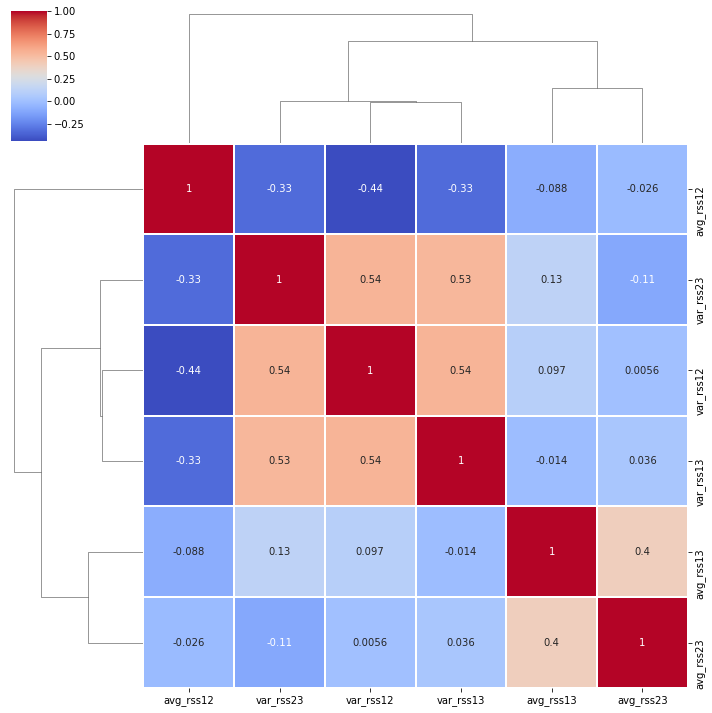

In [32]:
plt.figure(figsize=(3,3))
sns.clustermap(df.corr(),annot=True,cmap="coolwarm",linewidth=2)
plt.show()

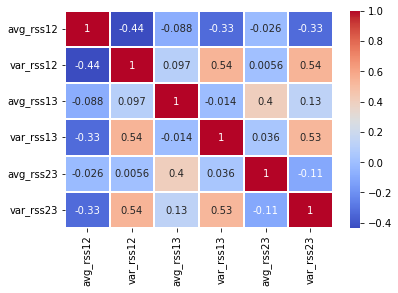

In [78]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidth=2,cbar=True)
plt.show()

##### no two columns show a correlation greater than 0.75. So as theorectically suggested,we are good to go here

## Checking correlation with time 

In [34]:
#df.drop('Time', axis=1).corrwith(df.Time).plot(kind='bar', grid=True, color=['salmon'],
#                                                   title="Correlation with Time")

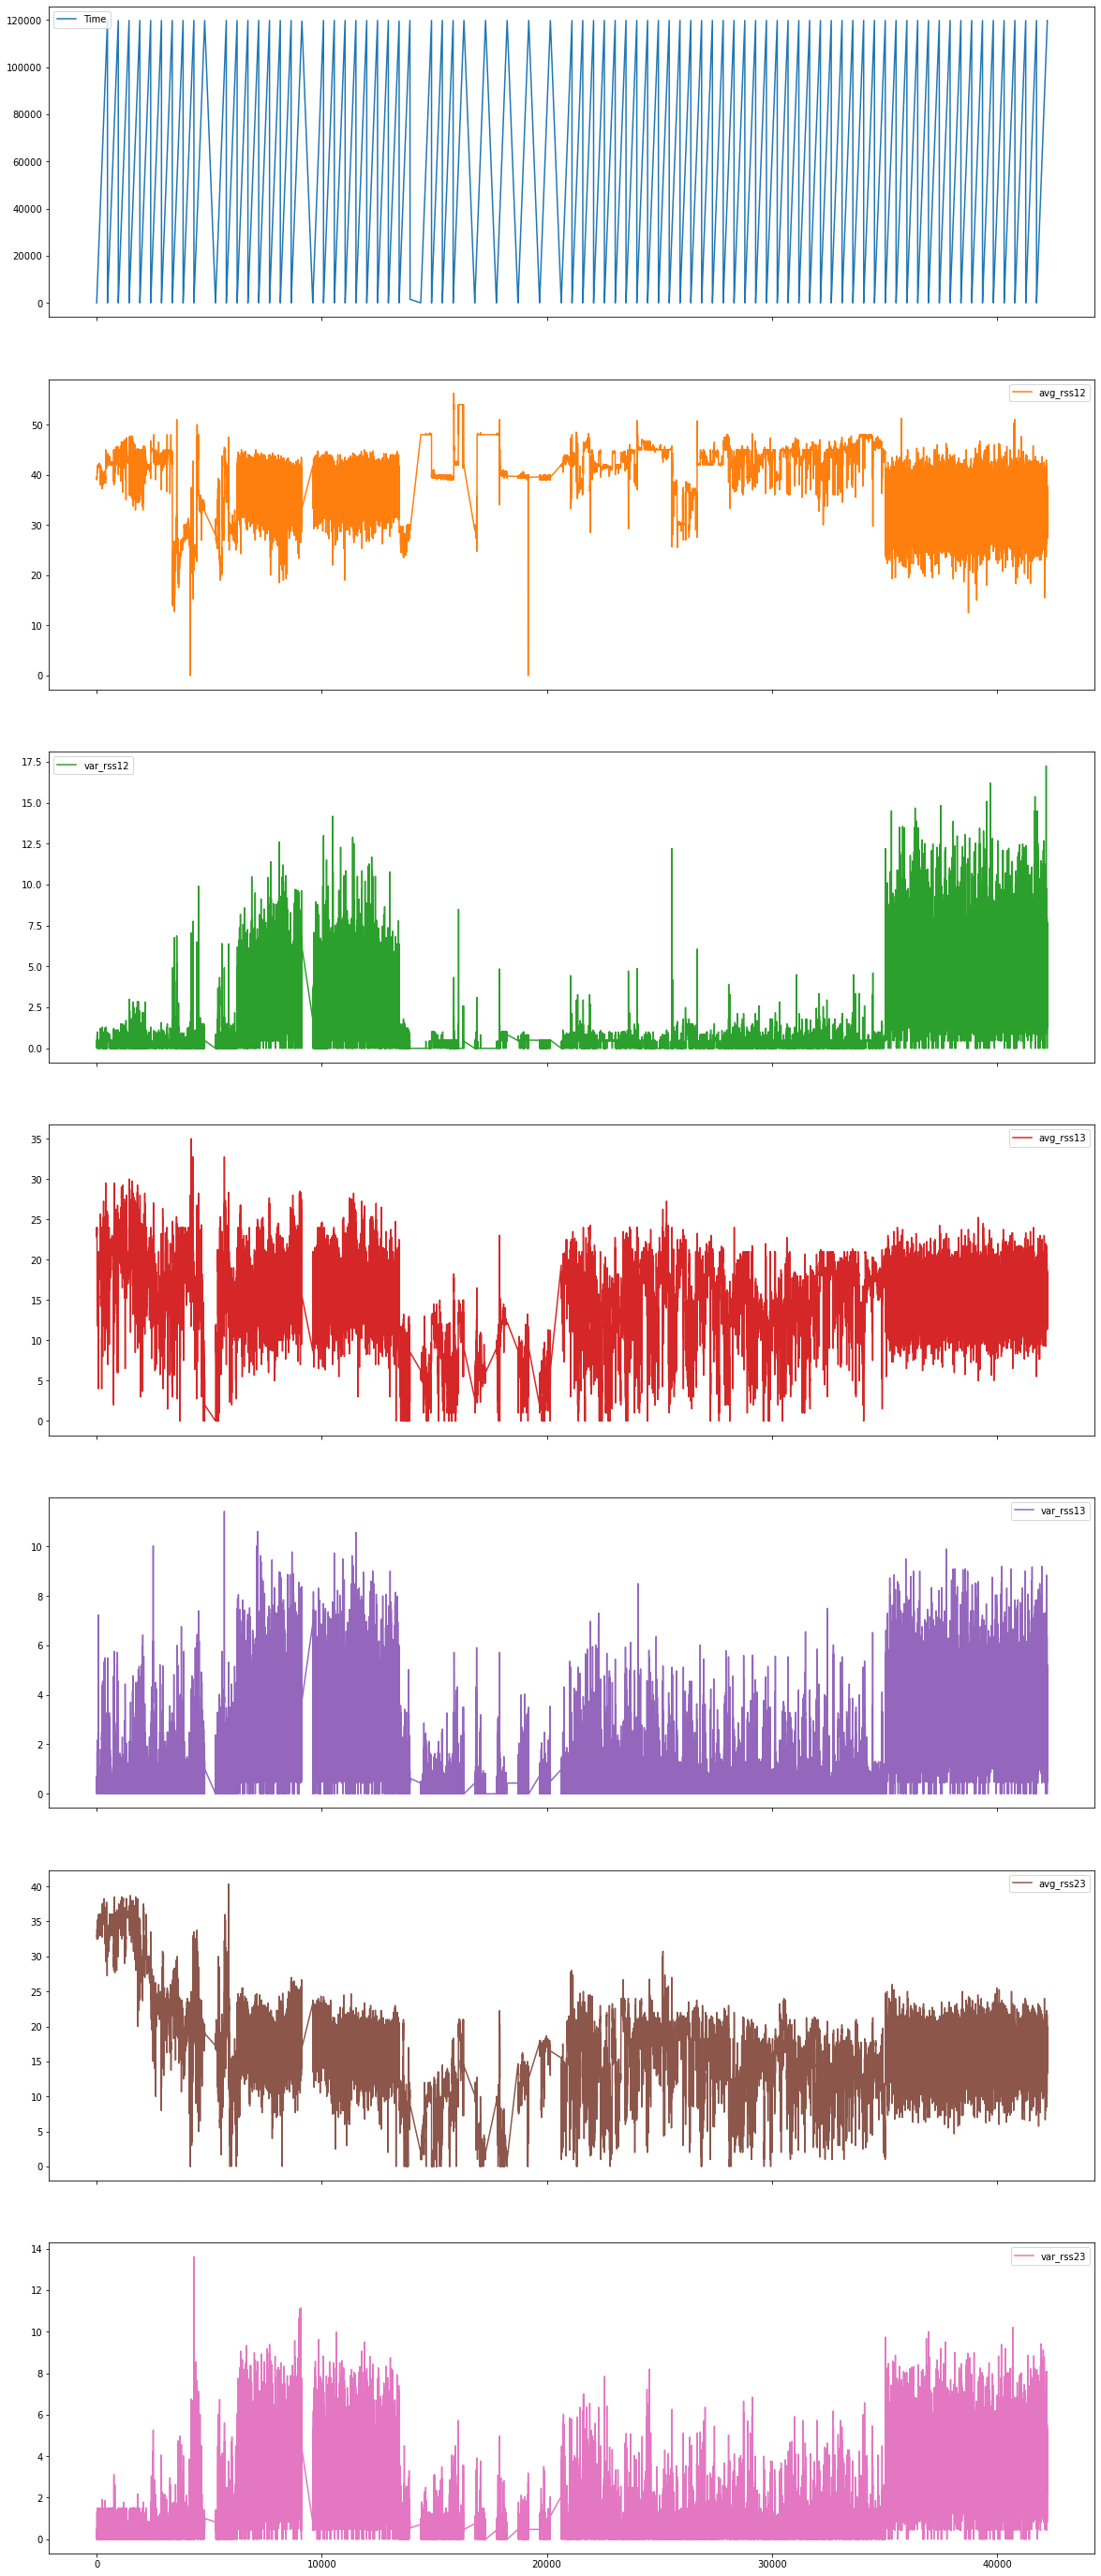

In [35]:
df.plot(subplots=True, sharex=True ,figsize=(20,50))
plt.show()

## Label encoder

In [38]:
# from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()

In [40]:
#cat_col=df.columns[df.dtypes=="O"]
#cat_col

Index(['Time', 'Label'], dtype='object')

In [57]:
#for i in cat_col:
 #   df[i]=le.fit_transform(df[i])

## Standard Scaler

In [80]:
df_new=df

In [83]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#model=ss.fit(df_new)

## Model building 

In [84]:
x=df.drop(["Label"],axis=1)
y=df[["Label"]]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)

In [87]:
x_train.shape,y_train.shape

((26878, 7), (26878, 1))

In [88]:
x_test.shape,y_test.shape

((11520, 7), (11520, 1))

In [89]:
from sklearn.linear_model import LogisticRegression

In [100]:
ls=LogisticRegression(solver='newton_cg')

In [101]:
model=ls.fit(x_train,y_train)

In [102]:
y_pred=model.predict(x_test)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bending1       0.77      0.78      0.78      1005
    Bending2       0.66      0.55      0.60       745
     Cycling       0.58      0.61      0.60      1995
     Sitting       0.49      0.50      0.49      2171
    Standing       0.64      0.66      0.65      2182
     Walking       0.69      0.65      0.67      2158
       lying       0.72      0.73      0.72      1264

    accuracy                           0.63     11520
   macro avg       0.65      0.64      0.64     11520
weighted avg       0.63      0.63      0.63     11520



In [106]:
# saga 
ls=LogisticRegression(solver='saga')
model=ls.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bending1       0.36      0.00      0.01      1005
    Bending2       0.00      0.00      0.00       745
     Cycling       0.00      0.00      0.00      1995
     Sitting       0.19      0.70      0.30      2171
    Standing       0.28      0.34      0.30      2182
     Walking       0.46      0.18      0.26      2158
       lying       0.00      0.00      0.00      1264

    accuracy                           0.23     11520
   macro avg       0.18      0.17      0.12     11520
weighted avg       0.21      0.23      0.16     11520



In [107]:
ls=LogisticRegression(solver='liblinear')
model=ls.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bending1       0.61      0.73      0.67      1005
    Bending2       0.69      0.21      0.33       745
     Cycling       0.60      0.40      0.48      1995
     Sitting       0.42      0.38      0.40      2171
    Standing       0.53      0.73      0.61      2182
     Walking       0.65      0.76      0.70      2158
       lying       0.62      0.59      0.61      1264

    accuracy                           0.56     11520
   macro avg       0.59      0.54      0.54     11520
weighted avg       0.57      0.56      0.55     11520



# model depolyment 

In [109]:
!pip install mlflow

  Created wheel for databricks-cli: filename=databricks_cli-0.17.6-py3-none-any.whl size=143236 sha256=a1f7e4565c397d662ee987f65da358fdeb6952c88c121779c7dd86df78056388
  Stored in directory: c:\users\visha\appdata\local\pip\cache\wheels\06\d9\cb\1cdc0826334cb600957db0b5a8448db02a8995daeab2556745
Successfully built databricks-cli
  Attempting uninstall: pywin32
    Found existing installation: pywin32 302
    Uninstalling pywin32-302:
      Successfully uninstalled pywin32-302
  Rolling back uninstall of pywin32
  Moving to c:\users\visha\anaconda3\lib\site-packages\__pycache__\pythoncom.cpython-39.pyc
   from C:\Users\visha\AppData\Local\Temp\pip-uninstall-9a_srcab\pythoncom.cpython-39.pyc
  Moving to c:\users\visha\anaconda3\lib\site-packages\adodbapi
   from C:\Users\visha\anaconda3\Lib\site-packages\~dodbapi
  Moving to c:\users\visha\anaconda3\lib\site-packages\isapi
   from C:\Users\visha\anaconda3\Lib\site-packages\~sapi
  Moving to c:\users\visha\anaconda3\lib\site-packages\pyth

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\visha\\anaconda3\\Lib\\site-packages\\pywin32_system32\\pywintypes39.dll'
Consider using the `--user` option or check the permissions.



In [112]:
import mlflow
import mlflow.sklearn

ModuleNotFoundError: No module named 'mlflow'